In [19]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [8]:
from metclient.frost import auth
from metclient.geo_locations import GeoLocation

In [11]:
session = auth.Session(config_file='../config/config.ini')
poly = GeoLocation(place_id=198727066) # Oslo municipality

In [12]:
params = {
    "referencetime": "latest",
    "maxage": "P10Y",
    "geometry": poly.get_simplified_wkt(max_char_size=1800)
}

In [13]:
df = session.get_data_frame(type='lightning', dict_params=params)

In [15]:
df.head()

,version,year,month,day,hour,minutes,seconds,nanoseconds,latitude,longitude,...,semiMajorAxis,semiMinorAxis,chiSquareValue,riseTime,peakToZeroTime,maxRateOfRise,cloudIndicator,angleIndicator,signalIndicator,timingIndicator
0,0,2019,9,1,4,15,44,86878976,59.9993,10.5829,...,0.49,0.4,0.76,21.4,4.4,0.7,1,1,0,1
1,0,2019,9,1,4,15,44,86889216,59.9961,10.6738,...,0.40,0.4,0.97,8.1,30.4,-0.0,0,1,0,1
2,0,2019,9,1,4,15,43,200306432,59.8881,10.7739,...,0.40,0.4,2.92,12.5,9.9,2.1,0,1,0,1
3,0,2019,9,1,4,15,43,605063936,60.0135,10.8106,...,0.40,0.4,4.80,2.2,21.6,-4.3,0,1,0,1
4,0,2019,9,1,4,15,43,201830656,59.8879,10.7333,...,2.16,0.4,0.53,9.9,44.8,0.4,1,1,0,1


In [24]:
df["year"].value_counts().sort_index()

2010     316
2011     205
2012     196
2013     394
2014     972
2015     142
2016     462
2017      75
2018     245
2019    1783
Name: year, dtype: int64

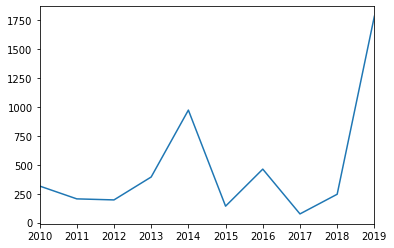

In [23]:
df["year"].value_counts().sort_index().plot()